# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#gat"> Data Gathering</a></li>
<li><a href="#ass">Assessing Data</a></li>
<li><a href="#cln">Cleaning Data</a></li>
<li><a href="#str">Storing Data</a></li>
<li><a href="#anav">Analyzing and Visualizing Data</a></li>
</ul>

<a id='gat'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
import pandas as pd
df = pd.read_csv('twitter-archive-enhanced.csv')
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
import os

Creating a folder with a name *andy_reviews*

In [3]:
folder_name = 'andy_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

Using the **request library** to scrip data from the given address in the *url*

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

Slipt function was used here to split and get the file in the last side of the line

In [5]:
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import tweepy

I am running a file  **keys.ipynb**, which contains credentials

In [9]:
%run ./keys.ipynb

Passing credentials into tweepy, so I can get access

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

querying additional data via the Twitter API (tweet_json.txt)

In [13]:
df_1 = []
error = []

import time

start = time.time()

for p in df['tweet_id']:
    try:
        data = api.get_status(p, tweet_mode = 'extended')
        
        ID = str(data.id)
        favorite_count = int(data.favorite_count) 
        retweet_count = int(data.retweet_count)
        source = str(data.source )
        source_url = str(data.source_url )
        
        
        df_1.append({'tweet_id': ID,
                     'favorite_count': favorite_count,
                     'retweet_count': retweet_count,
                     'source': source,
                     'source_url': source_url})
        
    except Exception as e:
        error.append(p)
    
end = time.time()

In [15]:
print(len(df_1))
print(len(error))

2085
271


In [16]:
error1 = []

for t in error:
    try:
        
        ID = str(data.id)
        favorite_count = int(data.favorite_count) 
        retweet_count = int(data.retweet_count)
        source = str(data.source )
        source_url = str(data.source_url )
        
        
        df_1.append({'tweet_id': ID,
                     'favorite_count': favorite_count,
                     'retweet_count': retweet_count,
                     'source': source,
                     'source_url': source_url})
    except Exception as e:
        error1.append(t)
        

In [17]:
print(len(df_1))
print(len(error1))

2356
0


In [27]:
tweet = pd.DataFrame(df_1, columns= ['tweet_id', 'favorite_count','retweet_count',
                                    'source','source_url'])

In [28]:
tweet.to_csv('tweet_json.txt', encoding = 'utf-8', index = False)

<a id='ass'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
#Display twitter-archive table
twit_archive = pd.read_csv('twitter-archive-enhanced.csv')
twit_archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
424,821522889702862852,NaN,NaN,2017-01-18 01:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harlso. He has a really good idea but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821522889...,13,10,Harlso,None,None,None,None
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cal. He's a Swedish Geriatric Cheddar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,None,None,None,None
48,882992080364220416,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,None,None,None,None
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,None,None,None,None
430,821044531881721856,NaN,NaN,2017-01-16 17:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flash. He went way too hard celebratin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821044531...,12,10,Flash,None,None,None,None
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Cool dog. Enjoys couch. Low monotone bark. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482...,4,10,None,None,None,None,None
1991,672622327801233409,NaN,NaN,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672622327...,12,10,None,None,None,pupper,None
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,None,None,None,None
1651,683498322573824003,NaN,NaN,2016-01-03 04:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Griffin. He's desperate for both a phy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683498322...,11,10,Griffin,None,None,None,None


In [6]:
twit_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
twit_archive.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [8]:
twit_archive[twit_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
twit_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
twit_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [11]:
twit_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
twit_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [13]:
twit_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [14]:
twit_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
twit_archive.rating_denominator.sort_values(ascending = False)

1120    170
902     150
1634    130
1779    120
1635    110
       ... 
776      10
806      10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [16]:
twit_archive.rating_numerator.sort_values(ascending = False)

979     1776
313      960
189      666
188      420
2074     420
        ... 
2335       1
605        1
2038       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [17]:
twit_archive[twit_archive.retweeted_status_id == \
                                 twit_archive.retweeted_status_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [18]:
twit_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#Display image-predictions table
image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
image_pred.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1959,865718153858494464,https://pbs.twimg.com/media/DAOmEZiXYAAcv2S.jpg,1,golden_retriever,0.673664,True,kuvasz,0.157523,True,Labrador_retriever,0.126073,True
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
511,676191832485810177,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,2,Chihuahua,0.376741,True,Italian_greyhound,0.173114,True,muzzle,0.071485,False
443,674638615994089473,https://pbs.twimg.com/media/CVzMPh1UsAELQ_p.jpg,1,Pomeranian,0.846986,True,chow,0.142014,True,keeshond,0.002605,True
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True
1014,709566166965075968,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True
1213,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
1293,751598357617971201,https://pbs.twimg.com/media/Cm42t5vXEAAv4CS.jpg,1,toy_poodle,0.757756,True,miniature_poodle,0.035150,True,Scottish_deerhound,0.027698,True
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True
1103,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,3,Pomeranian,0.997750,True,Chihuahua,0.001248,True,Pekinese,0.000775,True


In [20]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_pred[image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [22]:
image_pred[image_pred.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [23]:
image_pred[image_pred['jpg_url'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [24]:
image_pred[image_pred['p1_conf'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
image_pred[image_pred['p2_conf'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
image_pred[image_pred['p3_conf'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [27]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
#Display tweet_json table
tweet = pd.read_csv('tweet_json.txt')
tweet.sample(50)

,tweet_id,favorite_count,retweet_count,source,source_url
2065,666273097616637952,151,66,Twitter for iPhone,http://twitter.com/download/iphone
2313,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
401,822244816520155136,33016,9186,Twitter for iPhone,http://twitter.com/download/iphone
1352,696900204696625153,2914,935,Twitter for iPhone,http://twitter.com/download/iphone
641,791026214425268224,0,3792,Twitter for iPhone,http://twitter.com/download/iphone
1229,706681918348251136,3023,890,Twitter for iPhone,http://twitter.com/download/iphone
319,832645525019123713,2732,484,Twitter Web Client,http://twitter.com
1021,734776360183431168,2312,487,Twitter for iPhone,http://twitter.com/download/iphone
1093,719367763014393856,2599,686,Twitter for iPhone,http://twitter.com/download/iphone
1167,710833117892898816,2465,476,Twitter for iPhone,http://twitter.com/download/iphone


In [29]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2356 non-null   int64 
 1   favorite_count  2356 non-null   int64 
 2   retweet_count   2356 non-null   int64 
 3   source          2356 non-null   object
 4   source_url      2356 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.2+ KB


In [30]:
tweet[tweet.tweet_id.duplicated()]

,tweet_id,favorite_count,retweet_count,source,source_url
2085,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
2086,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
2087,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
2088,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
2089,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
...,...,...,...,...,...
2351,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
2352,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
2353,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone
2354,666020888022790149,2285,420,Twitter for iPhone,http://twitter.com/download/iphone


In [31]:
tweet[tweet['favorite_count'].isnull()]

,tweet_id,favorite_count,retweet_count,source,source_url


In [32]:
tweet[tweet['retweet_count'].isnull()]

,tweet_id,favorite_count,retweet_count,source,source_url


In [33]:
tweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.356000e+03,2356.000000,2356.000000
mean,7.379962e+17,6882.974958,2344.143039
std,6.982604e+16,10787.410714,4111.020590
min,6.660209e+17,0.000000,1.000000
25%,6.715583e+17,1734.750000,420.000000
50%,7.100179e+17,2754.500000,1026.000000
75%,7.976518e+17,8169.250000,2706.250000
max,8.924206e+17,144327.000000,70372.000000


### Quality issues
#### `twit_archive` table
- We only want original ratings (no retweets) that have images
- the column *timestamp* should have a datetime datatype
- tweet_id should be an object datatype instead of int64, since no calculation will done on it
- expanded urls columns contains NaN values.
- the number of None values in the columns **doggo, floofer, pupper, and puppo** is very large.
- Name column consists of many invalid values like "a"
- The NA value in name colunm is not in accurate data format
- Convert the data type in both 'rating_numerator' and 'rating_denominator' columns as float

#### `image_pred` table 
- tweet_id should be an object datatype instead of int64, since no calculation will done on it
- img_num should have a datatype of object instead of int64
- Different tweet_ids have the same jpg_url

#### `tweet`
- repeatition of record for tweet_id **666020888022790149**
- tweet_id should be an object datatype instead of int64, since no calculation will done on it

### Tidiness issues
#### `twit_archive` table
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns should be remove, because we have tweet_id, which can represent all 
- retweeted_status_timestamp column should be remove since we have timestamp column that also give time
- the columns doggo, floofer, pupper, and puppo has a lot of None values(NaN), they have to be remove since replacing them will be unwise
- The 4 different columns (doggo, floofer, pupper, and puppo) should be merged into a single one

<a id='cln'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
# Make copies of original pieces of data
twit_archive_clean = twit_archive.copy()
image_pred_clean = image_pred.copy()
tweet_clean = tweet.copy()

### Quality

#### We only want original ratings (no retweets) that have images

##### Define: Keep only original ratings (no retweets) that have images by removing rows of which the values in 'retweeted_status_id' column that  is not null.

##### Code

In [35]:
twit_archive_clean.drop(twit_archive_clean[twit_archive_clean.retweeted_status_id == \
                                 twit_archive_clean.retweeted_status_id].index, inplace=True)

##### Test

In [36]:
twit_archive_clean[twit_archive_clean.retweeted_status_id == \
                                 twit_archive_clean.retweeted_status_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### tweet_id should be an object datatype instead of int64, since no calculation will done on it and the column timestamp should have a datetime datatype

#### Define: Convert the tweet_id column's data type from a float to a string using astype and  convert timestamp column to datetime format using pd.to_datetime() function

#### Code

In [37]:
import datetime
twit_archive_clean.tweet_id = twit_archive_clean.tweet_id.astype(str)
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)
image_pred_clean.img_num = image_pred_clean.img_num.astype(str)
tweet_clean.tweet_id =  tweet_clean.tweet_id.astype(str)
twit_archive_clean['timestamp']= pd.to_datetime(twit_archive_clean['timestamp'])

#### Test

In [38]:
print(twit_archive_clean['tweet_id'].dtypes)
print(twit_archive_clean['timestamp'].dtypes)

object
datetime64[ns, UTC]


In [39]:
print(image_pred_clean['tweet_id'].dtypes)
print(image_pred_clean['img_num'].dtypes)

object
object


In [40]:
print(tweet_clean['tweet_id'].dtypes)

object


#### repeatition of record for tweet_id 666020888022790149

#### Define: Remove duplicate tweet_id from tweet_clean table

#### Code

In [41]:
tweet_clean = tweet_clean[~(tweet_clean.tweet_id.duplicated())]

#### Test

In [42]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2085 non-null   object
 1   favorite_count  2085 non-null   int64 
 2   retweet_count   2085 non-null   int64 
 3   source          2085 non-null   object
 4   source_url      2085 non-null   object
dtypes: int64(2), object(3)
memory usage: 97.7+ KB


In [43]:
tweet_clean['tweet_id'].nunique()

2085

#### Define: Correct invalid values in name column.

#### Code:

In [44]:
twit_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [45]:
for n in twit_archive_clean.name:
    if n.islower():
        twit_archive_clean.name.replace(n, 'None', inplace = True)
twit_archive_clean.name = twit_archive_clean.name.replace('O', 'None')

##### Test

In [46]:
twit_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

#### Define: Convert NA value in name column to accurate data type.

#### Code:

In [47]:
import numpy as np
twit_archive_clean.name = twit_archive_clean.name.apply(lambda y: y if y != 'None' else np.nan)

#### Test

In [48]:
twit_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


##### Define: Convert the data type in both 'rating_numerator' and 'rating_denominator' columns as float

#### Code

In [49]:
twit_archive_clean.rating_numerator = twit_archive_clean.rating_numerator.astype(float)
twit_archive_clean.rating_denominator = twit_archive_clean.rating_denominator.astype(float)

##### Test

In [50]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

#### Define: Remove rows which contain same 'jpg_url' values

#### code

In [51]:
image_pred_clean = image_pred_clean.drop_duplicates('jpg_url')

#### Test

In [52]:
sum(image_pred_clean.jpg_url.duplicated())

0

### Tidiness

#### n_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id columns should be remove, because we have tweet_id, which can represent all

#### Define: Using the pandas.DataFrame.drop to drop the the columns mention above

#### Code

In [53]:
twit_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                        'retweeted_status_user_id'],axis = 1, inplace = True)

#### Test

In [54]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   timestamp                   2175 non-null   datetime64[ns, UTC]
 2   source                      2175 non-null   object             
 3   text                        2175 non-null   object             
 4   retweeted_status_timestamp  0 non-null      object             
 5   expanded_urls               2117 non-null   object             
 6   rating_numerator            2175 non-null   float64            
 7   rating_denominator          2175 non-null   float64            
 8   name                        1390 non-null   object             
 9   doggo                       2175 non-null   object             
 10  floofer                     2175 non-null   object          

#### Define: The different columns should be merged into a single one

#### Code

In [55]:
mel_col = ['doggo', 'floofer', 'pupper', 'puppo']
col = [x for x in twit_archive_clean.columns.tolist() if x not in mel_col]

# melt the the columns into values
twit_archive_clean = pd.melt(twit_archive_clean, id_vars = col, value_vars = mel_col, 
                         var_name = 'types', value_name = 'dog_type')

twit_archive_clean = twit_archive_clean.drop('types', 1)


twit_archive_clean = twit_archive_clean.sort_values('dog_type').drop_duplicates(subset='tweet_id', keep='last')

# replace 'None' with NaNs
twit_archive_clean['dog_type'].replace('None', np.nan, inplace = True)

# change dtype to categorical
twit_archive_clean['dog_type'] = twit_archive_clean['dog_type'].astype("category")

/tmp/ipykernel_31881/1899614565.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  twit_archive_clean = twit_archive_clean.drop('types', 1)


In [56]:
twit_archive_clean['dog_type'].value_counts()


pupper     234
doggo       75
puppo       25
floofer     10
Name: dog_type, dtype: int64

#### Test

In [57]:
twit_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   timestamp                   2175 non-null   datetime64[ns, UTC]
 2   source                      2175 non-null   object             
 3   text                        2175 non-null   object             
 4   retweeted_status_timestamp  0 non-null      object             
 5   expanded_urls               2117 non-null   object             
 6   rating_numerator            2175 non-null   float64            
 7   rating_denominator          2175 non-null   float64            
 8   name                        1390 non-null   object             
 9   dog_type                    344 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), objec

In [58]:
twit_archive_clean.describe()

,rating_numerator,rating_denominator
count,2175.000000,2175.000000
mean,13.215172,10.492874
std,47.725696,7.019084
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [59]:
image_pred_clean.describe()

,p1_conf,p2_conf,p3_conf
count,2009.000000,2.009000e+03,2.009000e+03
mean,0.594467,1.340727e-01,6.017061e-02
std,0.272236,1.006394e-01,5.085369e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.362925,5.353130e-02,1.610520e-02
50%,0.588230,1.170030e-01,4.947150e-02
75%,0.847292,1.948970e-01,9.157150e-02
max,1.000000,4.880140e-01,2.734190e-01


In [60]:
tweet_clean.describe()

,favorite_count,retweet_count
count,2085.000000,2085.000000
mean,7480.601439,2594.235492
std,11331.109742,4307.456557
min,0.000000,1.000000
25%,1418.000000,554.000000
50%,3291.000000,1268.000000
75%,9436.000000,3023.000000
max,144327.000000,70372.000000


In [61]:
master = pd.merge(twit_archive_clean, image_pred_clean, how = 'left', on = ['tweet_id'])
master_data = pd.merge(master, tweet_clean, how = 'left', on = ['tweet_id'])
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   timestamp                   2175 non-null   datetime64[ns, UTC]
 2   source_x                    2175 non-null   object             
 3   text                        2175 non-null   object             
 4   retweeted_status_timestamp  0 non-null      object             
 5   expanded_urls               2117 non-null   object             
 6   rating_numerator            2175 non-null   float64            
 7   rating_denominator          2175 non-null   float64            
 8   name                        1390 non-null   object             
 9   dog_type                    344 non-null    category           
 10  jpg_url                     1994 non-null   object          

In [62]:
master_data[master_data['jpg_url'].isnull()]

,tweet_id,timestamp,source_x,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,source_y,source_url
46,667070482143944705,2015-11-18 20:02:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,10.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.0,13.0,Twitter for iPhone,http://twitter.com/download/iphone
138,875097192612077568,2017-06-14 21:06:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,https://twitter.com/drboondoc/status/874413398...,13.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24178.0,5096.0,Twitter for iPhone,http://twitter.com/download/iphone
143,876537666061221889,2017-06-18 20:30:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,https://twitter.com/mpstowerham/status/8761629...,14.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20998.0,3962.0,Twitter for iPhone,http://twitter.com/download/iphone
153,886267009285017600,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,12.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,105.0,4.0,Twitter for iPhone,http://twitter.com/download/iphone
179,878604707211726852,2017-06-24 13:24:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,https://twitter.com/bbcworld/status/8785998685...,13.0,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26356.0,5900.0,Twitter for iPhone,http://twitter.com/download/iphone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,696100768806522880,2016-02-06 22:38:50+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This poor pupper has been stuck in a vortex si...,NaN,https://vine.co/v/i1KWj0vbvA9,10.0,10.0,NaN,pupper,...,NaN,NaN,NaN,NaN,NaN,NaN,1774.0,584.0,Vine - Make a Scene,http://vine.co
2146,759943073749200896,2016-08-01 02:45:22+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a wicked fast pupper. 12/10 camera coul...,NaN,https://vine.co/v/5AJm5pq7Kav,12.0,10.0,NaN,pupper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2149,696518437233913856,2016-02-08 02:18:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,10.0,10.0,NaN,pupper,...,NaN,NaN,NaN,NaN,NaN,NaN,3633.0,1562.0,Twitter for iPhone,http://twitter.com/download/iphone
2155,784183165795655680,2016-10-07 00:06:50+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,https://vine.co/v/5ghHLBMMdlV,12.0,10.0,Reginald,puppo,...,NaN,NaN,NaN,NaN,NaN,NaN,18894.0,7435.0,Vine - Make a Scene,http://vine.co


In [63]:
master_data.dropna(subset=['jpg_url', 'favorite_count'], inplace = True)
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1761 non-null   object             
 1   timestamp                   1761 non-null   datetime64[ns, UTC]
 2   source_x                    1761 non-null   object             
 3   text                        1761 non-null   object             
 4   retweeted_status_timestamp  0 non-null      object             
 5   expanded_urls               1761 non-null   object             
 6   rating_numerator            1761 non-null   float64            
 7   rating_denominator          1761 non-null   float64            
 8   name                        1207 non-null   object             
 9   dog_type                    264 non-null    category           
 10  jpg_url                     1761 non-null   object          

<a id='str'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
master_data.to_csv("twitter_archive_master.csv", index=False)

<a id='anav'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1761 non-null   object             
 1   timestamp                   1761 non-null   datetime64[ns, UTC]
 2   source_x                    1761 non-null   object             
 3   text                        1761 non-null   object             
 4   retweeted_status_timestamp  0 non-null      object             
 5   expanded_urls               1761 non-null   object             
 6   rating_numerator            1761 non-null   float64            
 7   rating_denominator          1761 non-null   float64            
 8   name                        1207 non-null   object             
 9   dog_type                    264 non-null    category           
 10  jpg_url                     1761 non-null   object          

In [66]:
master_data.sample(50)

,tweet_id,timestamp,source_x,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,source_y,source_url
793,669564461267722241,2015-11-25 17:13:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,https://twitter.com/dog_rates/status/669564461...,10.0,10.0,NaN,NaN,...,miniature_poodle,2.599200e-01,True,standard_poodle,8.252970e-02,True,335.0,104.0,Twitter for iPhone,http://twitter.com/download/iphone
166,889278841981685760,2017-07-24 00:19:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,https://twitter.com/dog_rates/status/889278841...,13.0,10.0,Oliver,NaN,...,borzoi,1.947420e-01,True,Saluki,2.735070e-02,True,22037.0,4424.0,Twitter for iPhone,http://twitter.com/download/iphone
94,666094000022159362,2015-11-16 03:22:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,https://twitter.com/dog_rates/status/666094000...,9.0,10.0,NaN,NaN,...,German_shepherd,7.825980e-02,True,malinois,7.562780e-02,True,142.0,63.0,Twitter for iPhone,http://twitter.com/download/iphone
507,714251586676113411,2016-03-28 00:43:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He hates potted plants. 8/10 w...,NaN,https://twitter.com/dog_rates/status/714251586...,8.0,10.0,Thumas,NaN,...,Bedlington_terrier,1.756520e-01,True,Great_Pyrenees,1.145240e-02,True,3021.0,758.0,Twitter for iPhone,http://twitter.com/download/iphone
226,691483041324204033,2016-01-25 04:49:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,https://twitter.com/dog_rates/status/691483041...,5.0,10.0,NaN,NaN,...,black-and-tan_coonhound,7.741960e-02,True,Gordon_setter,9.826430e-03,True,2195.0,500.0,Twitter for iPhone,http://twitter.com/download/iphone
99,666273097616637952,2015-11-16 15:14:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,https://twitter.com/dog_rates/status/666273097...,11.0,10.0,NaN,NaN,...,toy_terrier,1.118840e-01,True,basenji,1.111520e-01,True,151.0,66.0,Twitter for iPhone,http://twitter.com/download/iphone
2102,700864154249383937,2016-02-20 02:06:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,https://twitter.com/dog_rates/status/700864154...,12.0,10.0,NaN,pupper,...,Great_Pyrenees,1.872720e-01,True,Samoyed,3.490900e-03,True,2395.0,555.0,Twitter for iPhone,http://twitter.com/download/iphone
1736,733460102733135873,2016-05-20 00:51:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hermione. Her face is as old as time. ...,NaN,https://twitter.com/dog_rates/status/733460102...,11.0,10.0,Hermione,NaN,...,beaver,2.883110e-02,False,dhole,1.737900e-02,False,3867.0,1135.0,Twitter for iPhone,http://twitter.com/download/iphone
1505,838083903487373313,2017-03-04 17:49:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,NaN,https://twitter.com/dog_rates/status/838083903...,13.0,10.0,Daisy,NaN,...,seat_belt,1.641330e-01,False,Pomeranian,1.798100e-02,True,16437.0,2834.0,Twitter for iPhone,http://twitter.com/download/iphone
2030,794205286408003585,2016-11-03 15:51:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Laika. She was a space pupper. The fir...,NaN,https://twitter.com/dog_rates/status/794205286...,14.0,10.0,Laika,pupper,...,fountain,2.948270e-01,False,brass,2.037110e-02,False,8750.0,3102.0,Twitter for iPhone,http://twitter.com/download/iphone


In [67]:
master_data.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1761.000000,1761.000000,1761.000000,1.761000e+03,1.761000e+03,1761.000000,1761.000000
mean,12.458830,10.483248,0.592786,1.359484e-01,6.039113e-02,8277.542306,2373.796706
std,43.955448,6.845028,0.271485,1.018323e-01,5.084871e-02,11797.679242,4171.703294
min,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10,66.000000,11.000000
25%,10.000000,10.000000,0.363257,5.433560e-02,1.625340e-02,1990.000000,556.000000
50%,11.000000,10.000000,0.583936,1.197450e-01,4.953060e-02,3816.000000,1184.000000
75%,12.000000,10.000000,0.843359,1.967690e-01,9.150480e-02,10460.000000,2715.000000
max,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,144327.000000,70372.000000


#### In the p1 column, which one had the greatest rating_denominator 

In [80]:
master_data.groupby(by = ['name'], dropna = False).sum().sort_values('rating_numerator', ascending = False)

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
name,,,,,,,
NaN,7013.0,6353.0,319.295960,76.489905,33.494611,4200522.0,1372661.0
Atticus,1787.0,20.0,1.081959,0.246325,0.093779,9647.0,3704.0
Charlie,116.0,100.0,5.327692,1.141190,0.619934,92936.0,21832.0
Tucker,108.0,90.0,3.478487,1.989794,0.887972,65875.0,15610.0
Cooper,101.0,90.0,5.308735,1.319545,0.677463,54444.0,13969.0
...,...,...,...,...,...,...,...
Alexanderson,3.0,10.0,0.354488,0.159672,0.057498,1759.0,446.0
Chuck,3.0,10.0,0.326259,0.104539,0.072479,3591.0,1618.0
Charl,3.0,10.0,0.456186,0.258677,0.061783,2083.0,562.0


In [85]:
master_data.groupby(by=['name'], dropna = True).sum().sort_values('favorite_count', ascending = False)

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
name,,,,,,,
Bo,73.0,60.0,3.761626,0.669672,0.269480,158793.0,59652.0
Stephan,13.0,10.0,0.505370,0.120358,0.077008,111253.0,51453.0
Jamesy,13.0,10.0,0.905334,0.078060,0.001771,108550.0,30071.0
Zoey,35.0,30.0,1.504895,0.389819,0.237307,98460.0,26341.0
Charlie,116.0,100.0,5.327692,1.141190,0.619934,92936.0,21832.0
...,...,...,...,...,...,...,...
Kollin,9.0,10.0,0.980511,0.009166,0.002659,202.0,45.0
Keet,10.0,10.0,0.825678,0.090998,0.022956,192.0,45.0
Kallie,10.0,10.0,0.757942,0.037497,0.027271,181.0,35.0


##### which of the p2 columns had a greatest favorite count

In [70]:
master_data.groupby(by = ['p2'], dropna = False).sum().sort_values('favorite_count', ascending = False)

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
p2,,,,,,,
Labrador_retriever,1007.0,860.0,59.480731,10.634540,3.863244,1245337.0,335300.0
Cardigan,717.0,610.0,46.772835,8.422118,1.721985,669945.0,175074.0
golden_retriever,823.0,730.0,41.104443,12.147904,4.545970,653488.0,196303.0
Pomeranian,403.0,350.0,24.296492,4.133359,1.946178,522098.0,178600.0
Siberian_husky,366.0,320.0,19.175285,7.009292,2.917156,343145.0,106914.0
...,...,...,...,...,...,...,...
hair_spray,9.0,10.0,0.176320,0.097487,0.086502,284.0,70.0
cornet,10.0,10.0,0.390339,0.314149,0.255182,246.0,85.0
toaster,10.0,10.0,0.757942,0.037497,0.027271,181.0,35.0


#### A function to extract the maximum mean after grouping by p1, p2 or p3 and its corresponding p1, p2 or p3 name

In [82]:
def favorite(x,z):
    # finding mean after grouping 
    fav_mean = master_data.groupby(x).mean()[['favorite_count']]
    #finding the maximum mean 
    max_fav_mean = fav_mean['favorite_count'].max()
    #obtaining the corresponding p name
    if z == "name":
        p_name = fav_mean.favorite_count.idxmax()
    elif z == "p2":
        p_name = fav_mean.favorite_count.idxmax()
    elif z == "p3":
        p_name = fav_mean.favorite_count.idxmax()
    return print('p_name: '+ p_name, '   Value:',max_fav_mean)

In [83]:
favorite('name', 'name')

p_name: Stephan    Value: 111253.0


In [73]:
favorite('p2', 'p2')

p_name: leafhopper    Value: 70711.0


In [74]:
favorite('p3', 'p3')

p_name: conch    Value: 50163.0


### Insights:
1. The higher the favorite_count, the greater the numerator and denomintor ratings. Therefore any dog that has a higher favorite_count has a high rating.

2. The ralationship between the p1_conf and p2_conf is normaly distributed. This means most of the dogs has an average p1_conf and p2_conf

3. The relationship among the means of p1, p2 and p3 is moderate. Since their difference is not all that big

### Visualization

#### A graph to show the relationship between the means of favorite_count among p1, p2 and p3 after grouping them 

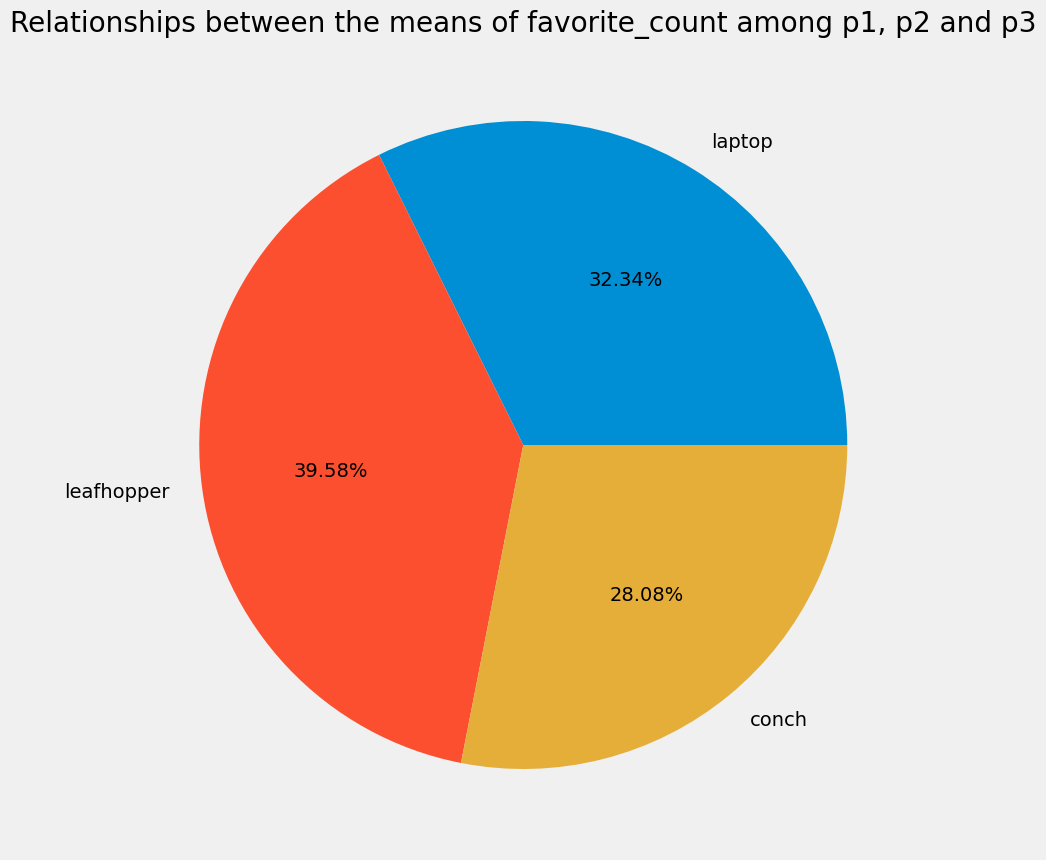

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#obtaining p1 value 
p1 = master_data.groupby('p1').mean()[['favorite_count']]
p1_value = p1['favorite_count'].max()

#obtaining p2 value
p2 = master_data.groupby('p2').mean()[['favorite_count']]
p2_value = p2['favorite_count'].max()

#obtaining p3 value
p3 = master_data.groupby('p3').mean()[['favorite_count']]
p3_value = p3['favorite_count'].max()

#ploting pie chart graph
p_values = [p1_value, p2_value, p3_value]
labels = ['laptop','leafhopper','conch']  

plt.figure(figsize=(10,10))
plt.pie(p_values, labels = labels, autopct='%.2f%%')
plt.title('Relationships between the means of favorite_count among p1, p2 and p3')
plt.show()

#### A graph showing the relationship of p1_conf and p2_conf

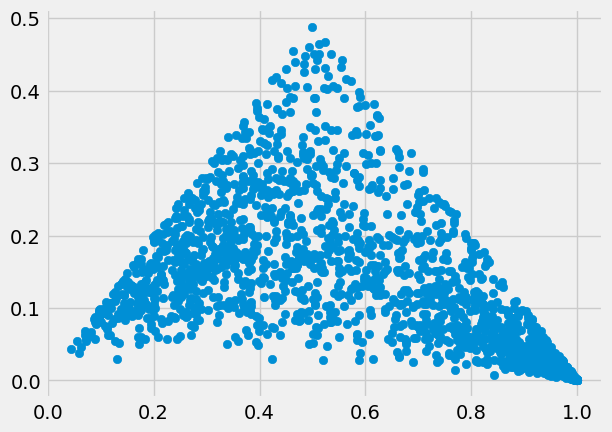

In [76]:
x = master_data['p1_conf']
y = master_data['p2_conf']
plt.scatter(x,y)
plt.show()

#### A graph showing the relationship of p1_conf and p3_conf

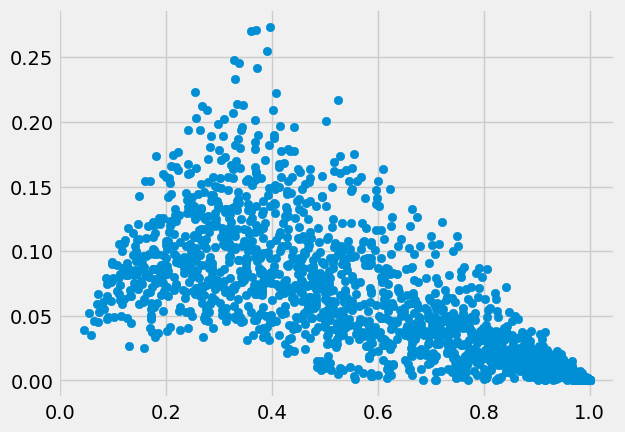

In [77]:
x = master_data['p1_conf']
y = master_data['p3_conf']
plt.scatter(x,y)
plt.show()

#### A graph showing the relationship of p2_conf and p3_conf

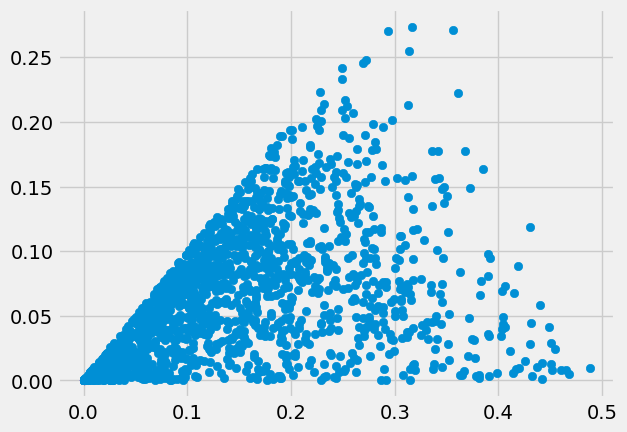

In [78]:
x = master_data['p2_conf']
y = master_data['p3_conf']
plt.scatter(x,y)
plt.show()

Text(0, 0.5, 'Values')

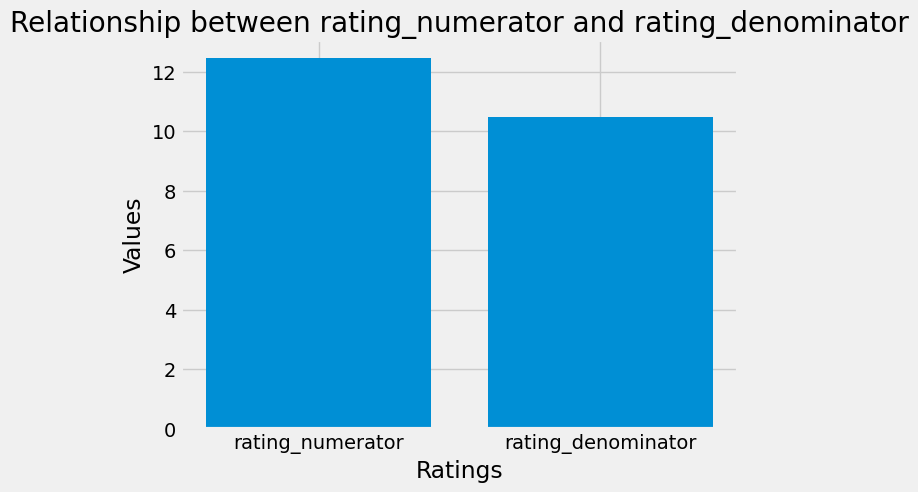

In [79]:
h1 = master_data['rating_numerator'].mean()
h2 = master_data['rating_denominator'].mean()

names = ['rating_numerator','rating_denominator']
height = [h1,h2]
plt.bar(names,height)
plt.title('Relationship between rating_numerator and rating_denominator')
plt.xlabel('Ratings')
plt.ylabel('Values')